In [52]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr

In [53]:
df = pd.read_csv('./data/salesmonthly.csv')
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


<Axes: >

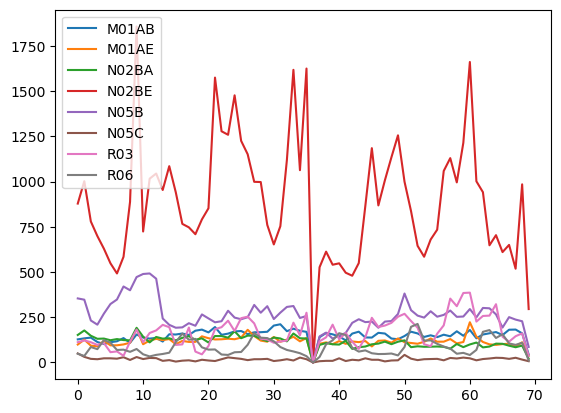

In [54]:
df.plot()

<Axes: xlabel='datum'>

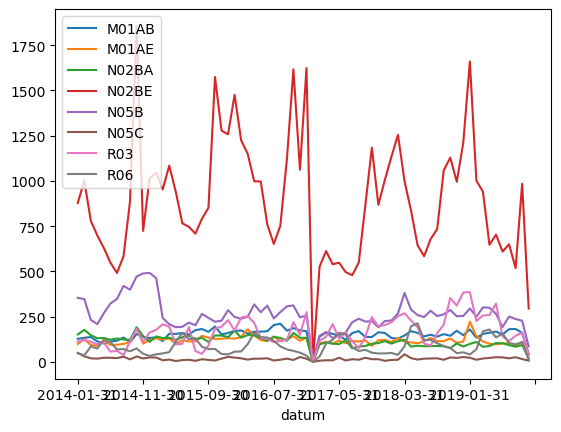

In [55]:
df.set_index('datum').plot()

<Axes: xlabel='date'>

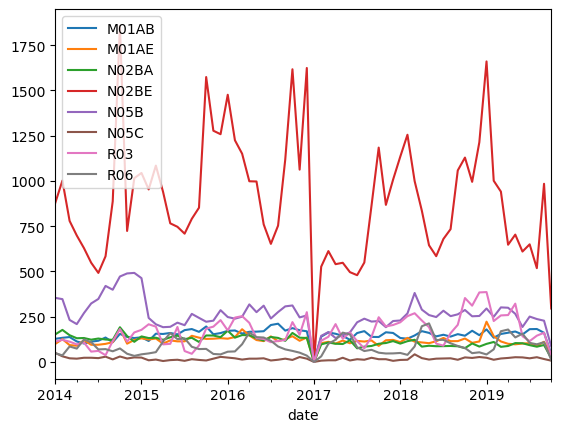

In [56]:
df['date'] = pd.to_datetime(df.datum)
df.set_index('date').plot()

In [57]:
monthly = df.set_index('date')
monthly['date'] = pd.to_datetime(df.datum)


<Axes: xlabel='date'>

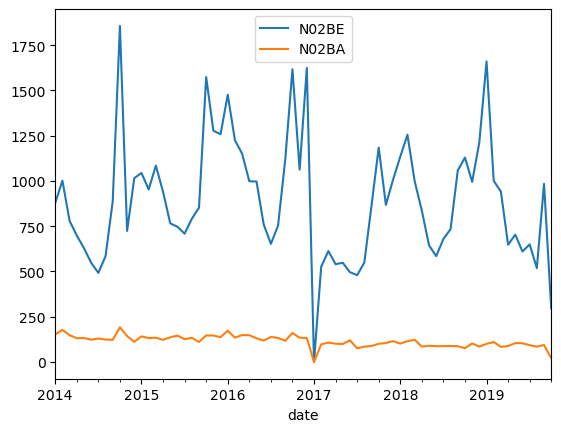

In [58]:
monthly[['N02BE', 'N02BA']].plot()

<Axes: xlabel='N02BE', ylabel='N02BA'>

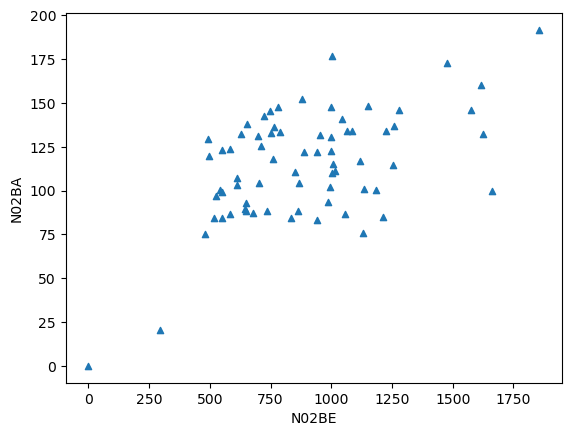

In [59]:
monthly.plot(x='N02BE', y='N02BA', kind='scatter', marker='^')

In [60]:
monthly.datum.apply(lambda x: pd.to_datetime(x).dayofyear)

date
2014-01-31     31
2014-02-28     59
2014-03-31     90
2014-04-30    120
2014-05-31    151
             ... 
2019-06-30    181
2019-07-31    212
2019-08-31    243
2019-09-30    273
2019-10-31    304
Name: datum, Length: 70, dtype: int64

array([[<Axes: title={'center': 'doy'}>]], dtype=object)

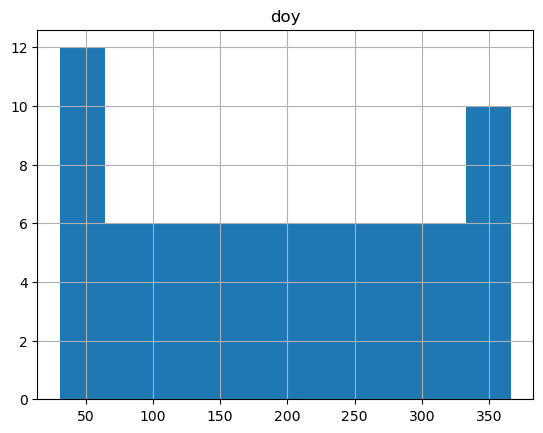

In [61]:
monthly['doy'] = monthly.datum.apply(lambda x: pd.to_datetime(x).dayofyear)
monthly.hist('doy')

In [62]:
pd.cut(monthly.doy, [-1, 50, 120, 220, 400], labels = [1, 2, 3, 4])

date
2014-01-31    1
2014-02-28    2
2014-03-31    2
2014-04-30    2
2014-05-31    3
             ..
2019-06-30    3
2019-07-31    3
2019-08-31    4
2019-09-30    4
2019-10-31    4
Name: doy, Length: 70, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [63]:
monthly['quater'] = pd.cut(monthly.doy, [-1, 50, 120, 220, 400], labels = [1, 2, 3, 4])

In [64]:
monthly.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,date,doy,quater
date,,,,,,,,,,,,
2014-01-31,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2,NaT,31,1
2014-02-28,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2,NaT,59,2
2014-03-31,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4,NaT,90,2
2014-04-30,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7,NaT,120,2
2014-05-31,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7,NaT,151,3


array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>]],
      dtype=object)

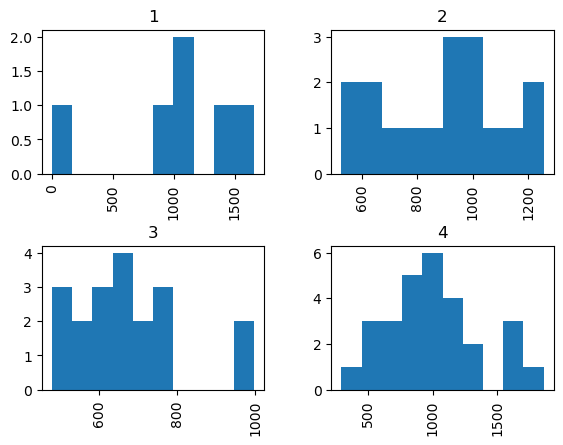

In [65]:
monthly = monthly.set_index('date')
monthly.hist('N02BE', by='quater')

## Exploratory Analysis with Time Series

In [66]:
df = pd.read_csv('./data/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [67]:
df.rename({'Month': 'Date'}, axis=1, inplace=True) #dict (old:new), axis(0 for row, 1 for column), inplace = True
df.rename({'#Passengers': 'Passengers'}, axis=1, inplace=True)
df.head()

,Date,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [68]:
# Change date to datetime objects
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Date'>

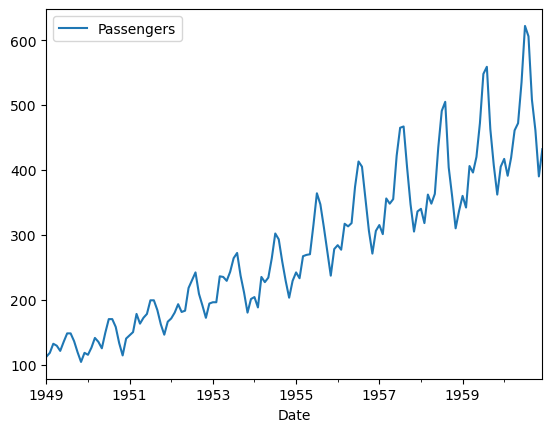

In [69]:
df.plot()

In [70]:
# trending up and cyclic - how can we decompose the data into parts ?
# use statsmodels.tsa

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df)

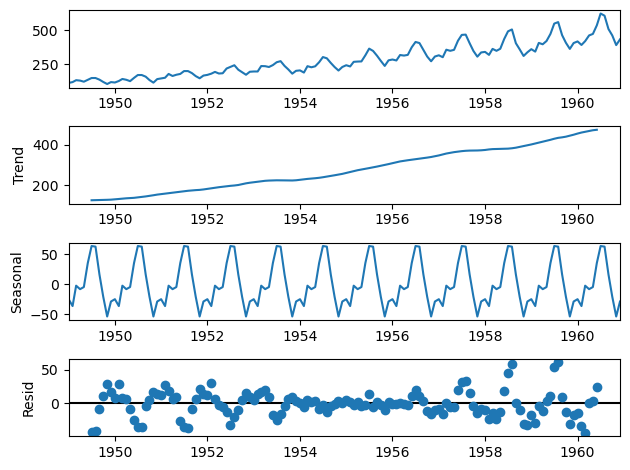

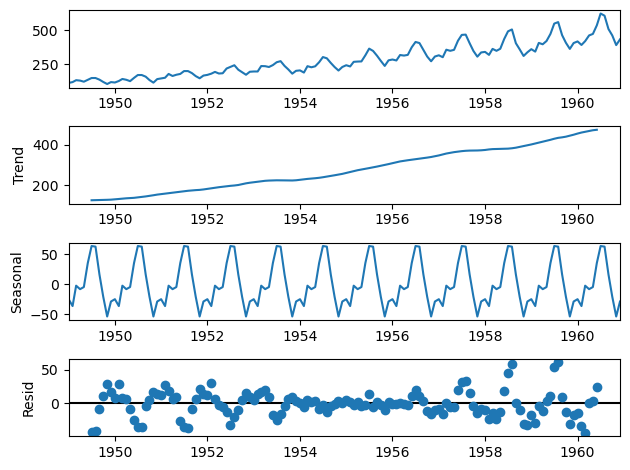

In [72]:
decomp.plot()

In [73]:
# can we extract data frames for trends, seasonal and residual values
decomp.resid

Date
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

In [74]:
decomp.resid.head(10)

Date
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01   -42.622475
1949-08-01   -42.073232
1949-09-01    -8.478535
1949-10-01    11.059343
Name: resid, dtype: float64

<Axes: xlabel='Date'>

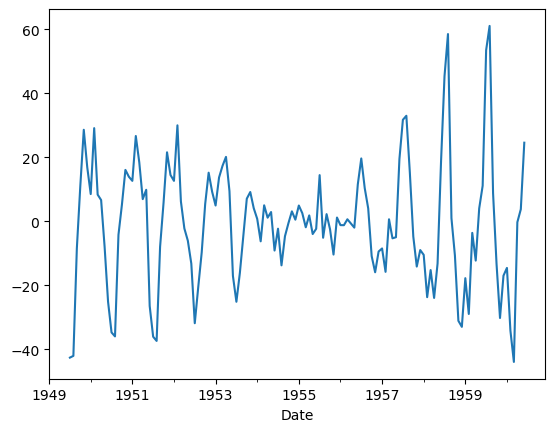

In [75]:
decomp.resid.plot()

<Axes: xlabel='Date'>

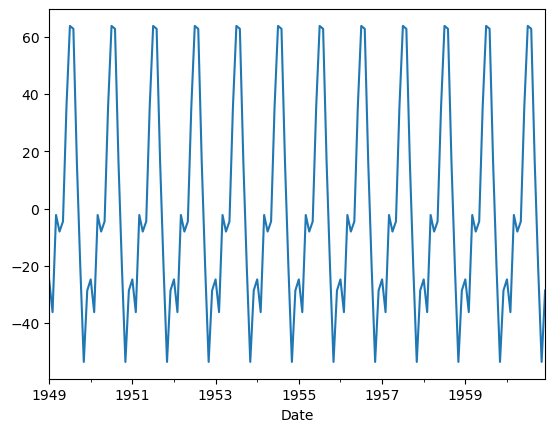

In [76]:
# what's a way of finding the length of the cycle ?
decomp.seasonal.plot()

In [77]:
# lets' create a dataframe where columns are year and rows are months
# so that we can compate years against one another
years = pd.DataFrame(index=range(1, 13))
years

""
1
2
3
4
5
6
7
8
9
10


In [78]:
# group df by year and extract year's data as a separate
df = df.reset_index()

# we can actually group by a *function on a column instead of just
# on column values
df.groupby(df.Date.apply(lambda x: x.year)).mean()

C:\Users\kamal\AppData\Local\Temp\ipykernel_19820\2206209100.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df.Date.apply(lambda x: x.year)).mean()


,Passengers
Date,
1949,126.666667
1950,139.666667
1951,170.166667
1952,197.000000
1953,225.000000
1954,238.916667
1955,284.000000
1956,328.250000
1957,368.416667


In [79]:
# place each year's data into years dataframe as a seperate column
for name, yr in df.groupby(df.Date.apply(lambda x: x.year)):
    years[name] = yr.Passengers.values

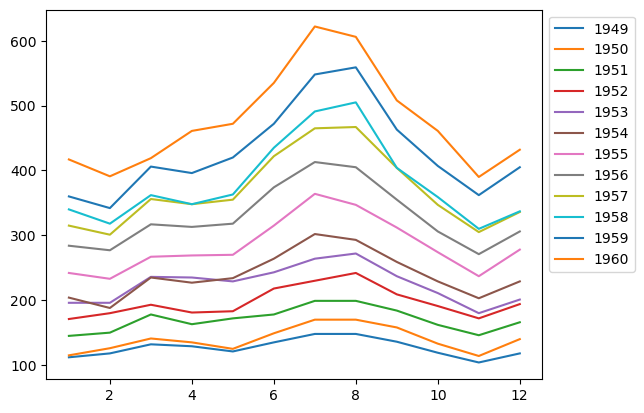

In [80]:
years.plot().legend(bbox_to_anchor=(1, 1))

In [81]:
years.corr() # correlation agnaist other year

,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
1949,1.000000,0.949435,0.944994,0.905623,0.970144,0.911553,0.908190,0.940419,0.933350,0.912513,0.901456,0.887272
1950,0.949435,1.000000,0.946923,0.957062,0.880477,0.930967,0.949866,0.938707,0.934320,0.904400,0.927191,0.887417
1951,0.944994,0.946923,1.000000,0.923131,0.939609,0.959165,0.939515,0.946961,0.946232,0.911054,0.947280,0.894268
1952,0.905623,0.957062,0.923131,1.000000,0.861005,0.942879,0.956044,0.960854,0.963146,0.960107,0.962860,0.925008
1953,0.970144,0.880477,0.939609,0.861005,1.000000,0.913945,0.884986,0.929524,0.928578,0.907120,0.902622,0.894288
1954,0.911553,0.930967,0.959165,0.942879,0.913945,1.000000,0.989433,0.984947,0.986983,0.962541,0.988882,0.965944
1955,0.908190,0.949866,0.939515,0.956044,0.884986,0.989433,1.000000,0.985527,0.982708,0.961328,0.984109,0.974451
1956,0.940419,0.938707,0.946961,0.960854,0.929524,0.984947,0.985527,1.000000,0.997125,0.983194,0.983704,0.977851
1957,0.933350,0.934320,0.946232,0.963146,0.928578,0.986983,0.982708,0.997125,1.000000,0.986762,0.988408,0.977076
1958,0.912513,0.904400,0.911054,0.960107,0.907120,0.962541,0.961328,0.983194,0.986762,1.000000,0.980656,0.976757


## Shifting Time Series
Time series may require shift data points to make a comparison. The shift and tshift functions shift data in time.

In [82]:
df = df.set_index('Date')

<Axes: xlabel='Date'>

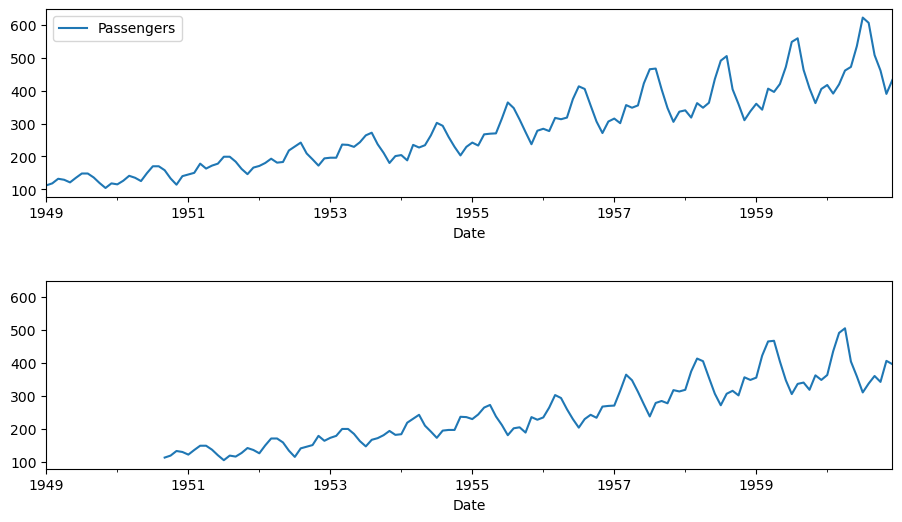

In [83]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, figsize=(10, 6),  sharey = True)
fig.tight_layout(pad=4)
df.plot(ax=ax[0], legend=True)
df.shift(20).plot(ax=ax[1], legend=None)

## Autocorrelation

In [84]:
df.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [85]:
df['Shift_2'] = df['Passengers'].shift(2)
df['Shift_20'] = df['Passengers'].shift(20)
df['Shift_-20'] = df['Passengers'].shift(-20)
df['diff'] = df['Shift_2'] - df['Passengers']
df.head(10)

,Passengers,Shift_2,Shift_20,Shift_-20,diff
Date,,,,,
1949-01-01,112,NaN,NaN,158.0,NaN
1949-02-01,118,NaN,NaN,133.0,NaN
1949-03-01,132,112.0,NaN,114.0,-20.0
1949-04-01,129,118.0,NaN,140.0,-11.0
1949-05-01,121,132.0,NaN,145.0,11.0
1949-06-01,135,129.0,NaN,150.0,-6.0
1949-07-01,148,121.0,NaN,178.0,-27.0
1949-08-01,148,135.0,NaN,163.0,-13.0
1949-09-01,136,148.0,NaN,172.0,12.0


<Axes: xlabel='Date'>

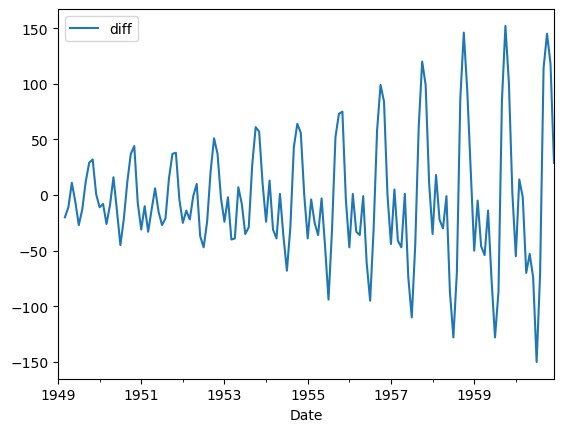

In [86]:
df.plot(y='diff')

## Partial Autocorrelation

In [87]:
# Make syntheic time series to explain differenc between 
# correlation and autocorrelation

# Break up sales: Base sales & sales due to promotion

sales = pd.DataFrame({'Month': range(180), 'Base':0, 'Promotion':0})
sales = sales.set_index('Month')
sales.head()

,Base,Promotion
Month,,
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


C:\Users\kamal\AppData\Local\Temp\ipykernel_19820\410369119.py:3: DeprecationWarning: This function is deprecated. Please call randint(-1, 1 + 1) instead
  sales['Base'] = 1000 + 10 * np.random.random_integers(-1, 1, 180)


<Axes: xlabel='Month'>

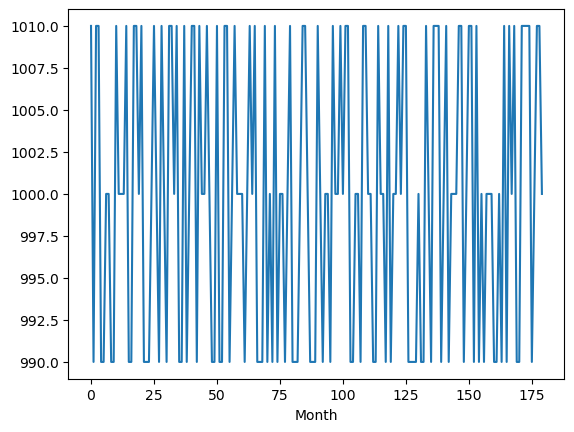

In [88]:
# Each month, around 1000 units are sold, give or take some random

sales['Base'] = 1000 + 10 * np.random.random_integers(-1, 1, 180)

# random fluctions 10 * [-1, 0, 1] = [-10, 0, 10]

sales.Base.plot()

C:\Users\kamal\AppData\Local\Temp\ipykernel_19820\1609797759.py:4: DeprecationWarning: This function is deprecated. Please call randint(-1, 1 + 1) instead
  noise = 2 * np.random.random_integers(-1, 1) # fluctation of -2 and 2


<Axes: xlabel='Month'>

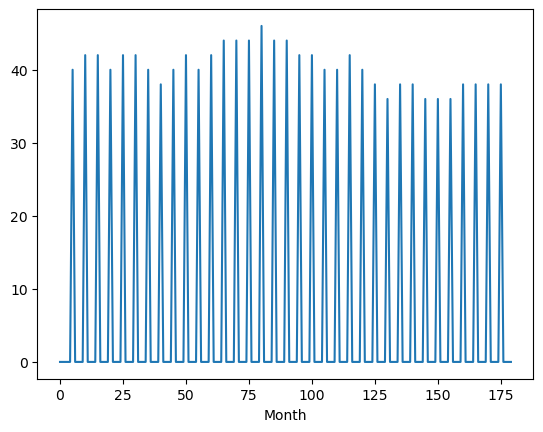

In [89]:
sales.loc[5, 'Promotion'] = 40

for i in range(10, 180, 5):
    noise = 2 * np.random.random_integers(-1, 1) # fluctation of -2 and 2
    sales.loc[i, 'Promotion'] = sales.loc[i-5, 'Promotion'] + noise

sales.Promotion.plot()

<Axes: xlabel='Month'>

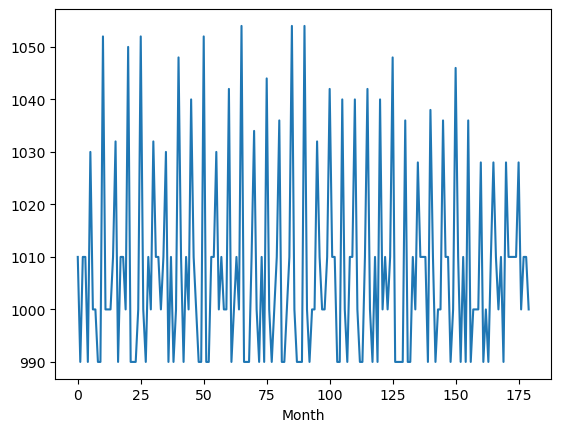

In [90]:
sales['Total'] = sales.Base + sales.Promotion
sales.Total.plot()

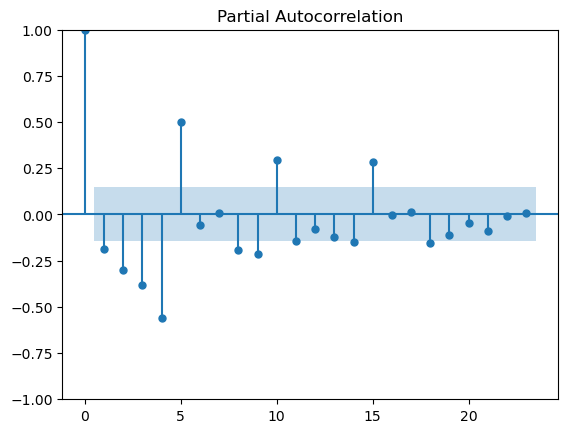

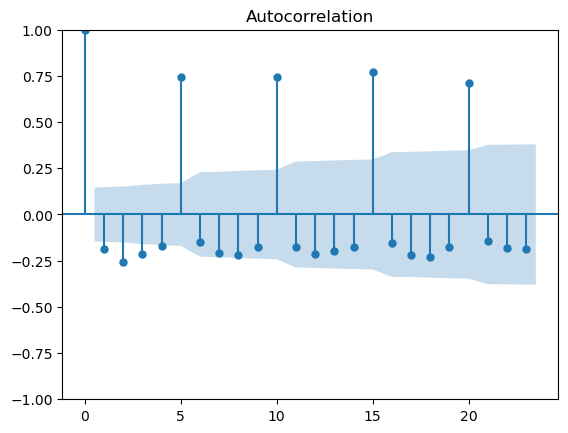

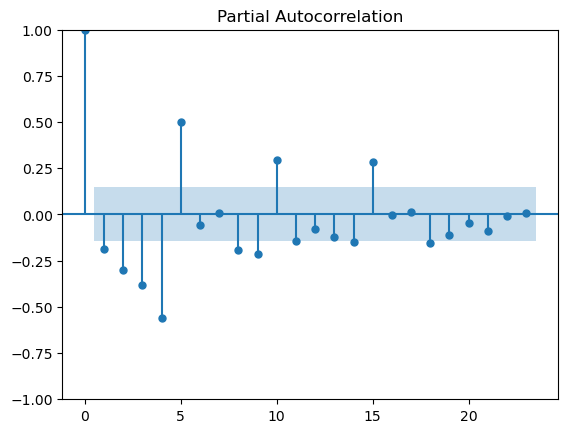

In [91]:
# Auto vs Correlation

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(sales.Total)
plot_pacf(sales.Total, method='ywm')

## Autocorrelation

In [92]:
df

,Passengers,Shift_2,Shift_20,Shift_-20,diff
Date,,,,,
1949-01-01,112,NaN,NaN,158.0,NaN
1949-02-01,118,NaN,NaN,133.0,NaN
1949-03-01,132,112.0,NaN,114.0,-20.0
1949-04-01,129,118.0,NaN,140.0,-11.0
1949-05-01,121,132.0,NaN,145.0,11.0
...,...,...,...,...,...
1960-08-01,606,535.0,337.0,NaN,-71.0
1960-09-01,508,622.0,360.0,NaN,114.0
1960-10-01,461,606.0,342.0,NaN,145.0


In [93]:
# Autocorrelation - correlation with self
# Way 1
df['Shifted3'] = df.Passengers.shift(-3)
df.head()

,Passengers,Shift_2,Shift_20,Shift_-20,diff,Shifted3
Date,,,,,,
1949-01-01,112,NaN,NaN,158.0,NaN,129.0
1949-02-01,118,NaN,NaN,133.0,NaN,121.0
1949-03-01,132,112.0,NaN,114.0,-20.0,135.0
1949-04-01,129,118.0,NaN,140.0,-11.0,148.0
1949-05-01,121,132.0,NaN,145.0,11.0,148.0


In [94]:
df.corr()

,Passengers,Shift_2,Shift_20,Shift_-20,diff,Shifted3
Passengers,1.000000,0.895675,0.751789,0.751789,-0.218117,0.837395
Shift_2,0.895675,1.000000,0.746891,0.859013,0.238640,0.785943
Shift_20,0.751789,0.746891,1.000000,0.722729,-0.004627,0.936717
Shift_-20,0.751789,0.859013,0.722729,1.000000,0.232122,0.745891
diff,-0.218117,0.238640,-0.004627,0.232122,1.000000,-0.157340
Shifted3,0.837395,0.785943,0.936717,0.745891,-0.157340,1.000000


In [95]:
df['Shifted12'] = df.Passengers.shift(-12)
df.head()

,Passengers,Shift_2,Shift_20,Shift_-20,diff,Shifted3,Shifted12
Date,,,,,,,
1949-01-01,112,NaN,NaN,158.0,NaN,129.0,115.0
1949-02-01,118,NaN,NaN,133.0,NaN,121.0,126.0
1949-03-01,132,112.0,NaN,114.0,-20.0,135.0,141.0
1949-04-01,129,118.0,NaN,140.0,-11.0,148.0,135.0
1949-05-01,121,132.0,NaN,145.0,11.0,148.0,125.0


In [96]:
df.corr().Passengers

Passengers    1.000000
Shift_2       0.895675
Shift_20      0.751789
Shift_-20     0.751789
diff         -0.218117
Shifted3      0.837395
Shifted12     0.990527
Name: Passengers, dtype: float64

In [97]:
df['Shifted24'] = df.Passengers.shift(-24)
df.corr().Passengers


Passengers    1.000000
Shift_2       0.895675
Shift_20      0.751789
Shift_-20     0.751789
diff         -0.218117
Shifted3      0.837395
Shifted12     0.990527
Shifted24     0.983254
Name: Passengers, dtype: float64

In [99]:
df.Passengers.autocorr(12)

0.990527369208544

In [102]:
df.Passengers.autocorr(3)

0.837394765081794

<Axes: >

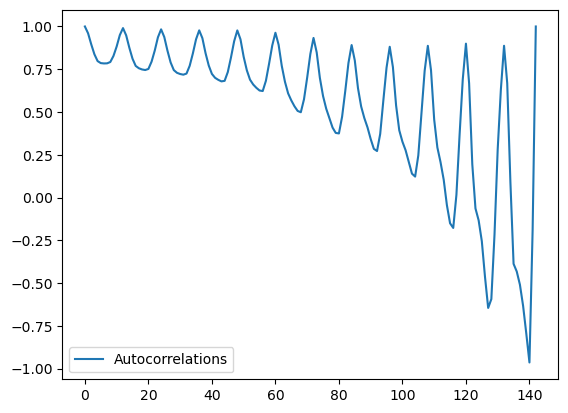

In [105]:
# Plot them all 
acs = pd.DataFrame({'Autocorrelations': [df.Passengers.autocorr(n) for n in range(143)]})
acs.plot()

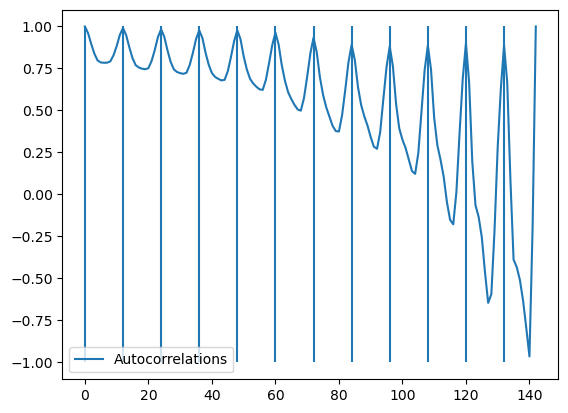

In [106]:
# The peak are at the lags that are multiple of 12
acs.plot().vlines(range(0, 142, 12), -1, 1)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

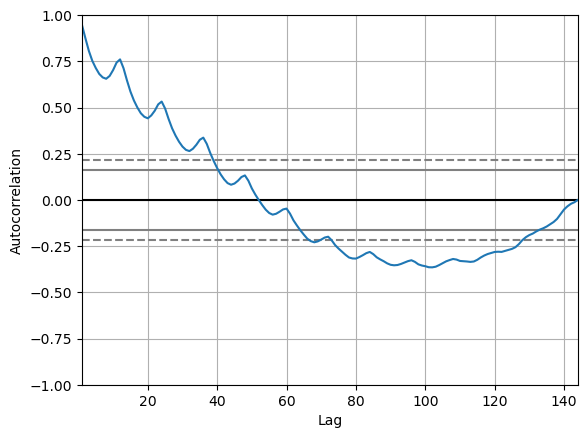

In [109]:
# Another way of plotting autocorr

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df[['Passengers']])

In [111]:
df[['Passengers']]

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [112]:
df['Passengers']

Date
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

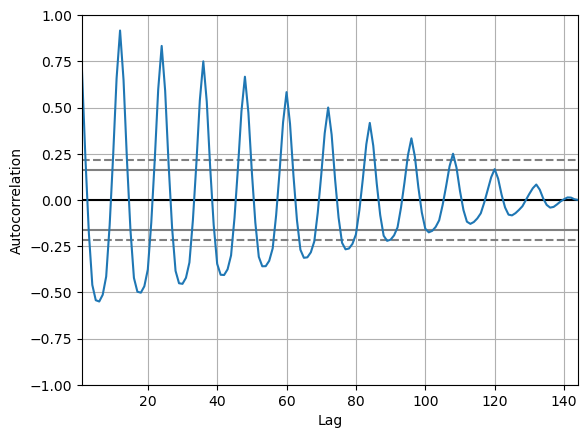

In [113]:
autocorrelation_plot(decomp.seasonal)

AttributeError: module 'numpy' has no attribute 'corr'